In [4]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

%matplotlib inline 

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [51]:
conn = sqlite3.connect("../db.sqlite3")
df = pd.read_sql_query(
    "SELECT * FROM restaurant_orderitem "
    "JOIN restaurant_order ON restaurant_orderitem.order_id = restaurant_order.id "
    "JOIN restaurant_product ON restaurant_orderitem.product_id = restaurant_product.id",
    conn                       
)
df = df.drop(columns=["id"])
df["datetime"] = pd.to_datetime(df["datetime"])
df.to_csv("../data.csv")

# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

<Axes: title={'center': 'Top 10 positions on menu by quantity'}, ylabel='quantity'>

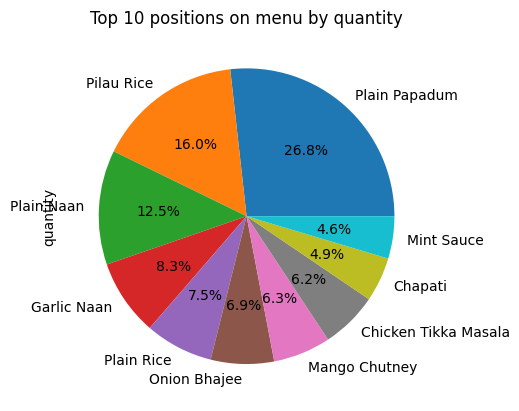

In [31]:
df.groupby("name")["quantity"].sum().nlargest(n=10).plot.pie(title="Top 10 positions on menu by quantity", autopct="%1.1f%%")

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

<Axes: title={'center': 'Top 10 positions on menu by profit'}, xlabel='Poduct name'>

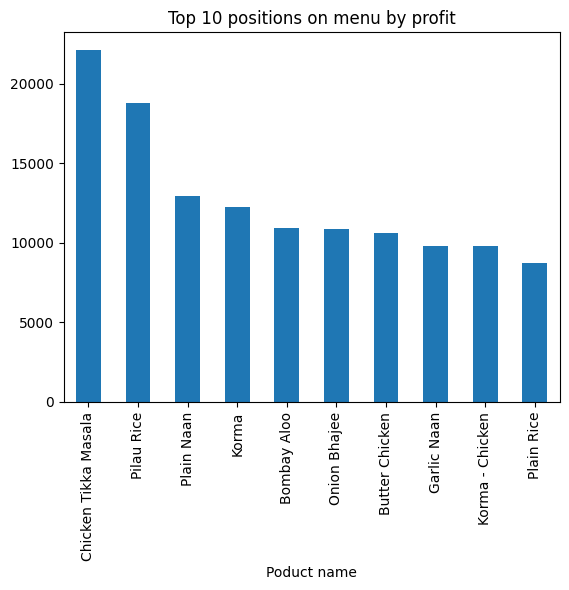

In [54]:
df["item_price"] = df["price"] * df["quantity"]
df.groupby("name")["item_price"].sum().nlargest(n=10).plot.bar(title="Top 10 positions on menu by profit", xlabel="Poduct name")

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

<Axes: xlabel='Work hour'>

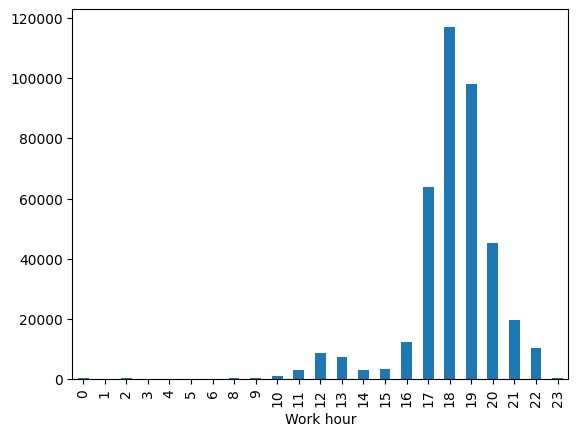

In [66]:
df.groupby([df["datetime"].dt.hour])["price"].sum().plot.bar(xlabel="Work hour")

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

<Axes: xlabel='Work day'>

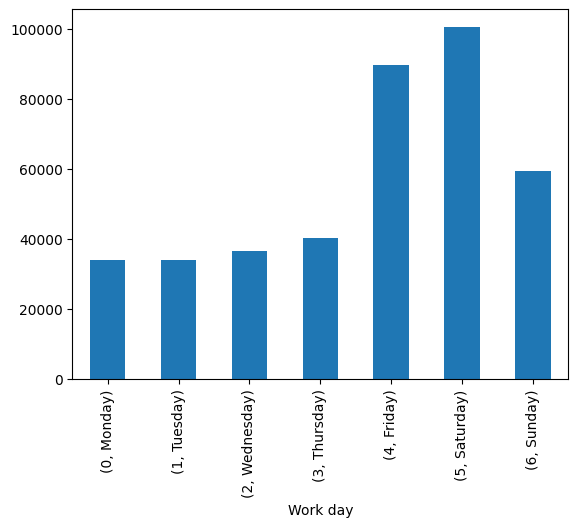

In [76]:
df.groupby(by=[df["datetime"].dt.day_of_week, df["datetime"].dt.day_name()])["price"].sum().plot.bar(xlabel="Work day")